A transposed convolution operation, also known as a deconvolution or an inverse convolution is a mathematical operation used in neural networks for upsampling or increasing the spatial resolution of an input tensor. 

It is mainly used to create features or reconstruct images from lower-dimensional representations, such as in autoencoders or generative adversarial networks. 

A normal convolution can be seen as a way of transforming the input into a lower-dimensional representation, while preserving some spatial information and extracting some features.

A transposed convolution is the opposite of a normal convolution, in the sense that it maps a smaller input to a larger output, while preserving the connectivity pattern of the original convolution. It can be seen as a way of undoing or reversing a convolution, by applying a filter that “dilates” the input and introduces zeros between the input elements. 

Affine transformations are a class of geometric transformations that preserve points, straight lines, and planes. These transformations include translation, rotation, scaling, and shearing

 **`Neural networks `** are Affine transformations : A vector is received as input and is multiplied with a matrix to produce an output (to which a bias vector is usually added before passing the result through a nonlinearity).

Image data is stored as as multi-dimensional arrays, They feature one or more axes for which ordering matters, One axis, called the channel axis, is used to access different views of the data (e.g., the red, green and blue channels of a color image, or the left and right channels of a stereo audio track in case of sound data)

These properties are not exploited when an affine transformation is applied;
in fact, all the axes are treated in the same way and the topological information is not taken into account

A discrete convolution is a linear transformation that preserves this notion
of ordering. It is sparse (only a few input units contribute to a given output
unit) and reuses parameters (the same weights are applied to multiple locations
in the input).

#### Upsampling

While regular convolution decreases spatial dimensions, transposed convolution does the opposite. It spreads the information over a larger area, effectively "stretching" the features.

The transposed convolution operation involves sliding a filter over the input tensor, but instead of computing a dot product, it performs an "inverse" operation.

Each element in the input tensor contributes to multiple elements in the output, leading to increased spatial dimensions.

Visualizing the filters in a transposed convolution layer helps understand how information is spread during upsampling.

Inspecting the output of a transposed convolution layer can reveal how features are distributed over the increased spatial dimensions.

####  Convolution as a matrix operation

Every convolution boils down to an efficient implementation of a matrix operation. 


<div align="center">
  <h5>Convolution and result</h5>  
   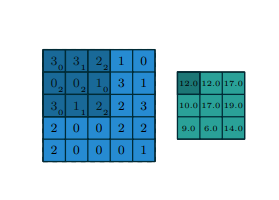 
</div>

In the code below this operation is done as matrix multiplication


In [5]:
import numpy as np
from scipy.sparse import lil_matrix

# Example Input
input_matrix = np.array([[3, 3, 2, 1, 0],
                         [0, 0, 1, 3, 1],
                         [3, 1, 2, 2, 3],
                         [2, 0, 0, 2, 2],
                         [2, 0, 0, 0, 1]])

input_size = input_matrix.shape
print(input_size)

# Output size
output_size = (3, 3)

# Convolution Kernel
kernel = np.array([[0, 1, 2],
                   [2, 2, 0],
                   [0, 1, 2]])

print(kernel.shape)
kernel_size = kernel.shape[0]

# Flatten the Input Matrix
flattened_input = input_matrix.flatten()

print(flattened_input.shape)

# Sparse Matrix C
C = lil_matrix((np.prod(output_size), np.prod(input_matrix.shape)))
# Fill in the non-zero elements based on the kernel
for i in range(output_size[0]):
    for j in range(output_size[1]):
        # Compute the indices in the unrolled vector
        row_idx = i * output_size[1] + j
        for m in range(kernel_size):
            for n in range(kernel_size):
                col_idx = (i + m) * input_size[1] + (j + n)
                C[row_idx, col_idx] = kernel[m, n]

# Convert the sparse matrix to a dense matrix for visualization
C_dense = C.toarray()
print(C_dense.shape)

# Convolution Operation (Linear Transformation)
result_vector = np.dot(C_dense, flattened_input)

# Reshape the Resulting Vector to 3x3 Matrix
output_matrix = result_vector.reshape(3, 3)

print("Input Matrix:")
print(input_matrix)
print("\nConvolution Kernel:")
print(kernel)
print("\nSparse Matrix C:")
print(C_dense)
print("\nResulting Vector:")
print(result_vector)
print("\nOutput Matrix:")
print(output_matrix)

(5, 5)
(3, 3)
(25,)
(9, 25)
Input Matrix:
[[3 3 2 1 0]
 [0 0 1 3 1]
 [3 1 2 2 3]
 [2 0 0 2 2]
 [2 0 0 0 1]]

Convolution Kernel:
[[0 1 2]
 [2 2 0]
 [0 1 2]]

Sparse Matrix C:
[[0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 0. 1. 2. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 0. 1. 2.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 2. 2. 0. 0. 0. 0. 1.
  2.]]

Resulting Vector:
[12. 12. 17. 10. 17. 19.  9.  6. 14.]

Output Matrix:
[[12. 12. 17.]
 [10. 17. 19.]
 

<a id="convbymatrix"></a>

Any convolution-filtering can be realized by matrix-multiplication:

$$
\mathbf{Y_s}=\mathbf{W_S}*\mathbf{X_S}
$$

Assume that the input is

$$
\mathbf{X}=\left[
	\begin{array}{cccc}
	x_{0,0} & x_{0,1} & x_{0,2} & x_{0,3} \\
	x_{1,0} & x_{1,1} & x_{1,2} & x_{1,3} \\
	x_{2,0} & x_{2,1} & x_{2,2} & x_{2,3} \\
	x_{3,0} & x_{3,1} & x_{3,2} & x_{3,3} \\
	\end{array}
	\right]
$$
    
and the filter is:

$$	
\mathbf{W}=\left[
\begin{array}{ccc}
w_{0,0} & w_{0,1} & w_{0,2} \\
w_{1,0} & w_{1,1} & w_{1,2}\\
w_{2,0} & w_{2,1} & w_{2,2}\\
\end{array}
\right]
$$
    
Then the serialized representation of the filter output, $\mathbf{Y_s}$, can be calculated by:

$$
\mathbf{Y_s}=\mathbf{W_S}*\mathbf{X_S},
$$

where $\mathbf{W_S}$ is 

$$
\mathbf{W_S}=\left[
	\begin{array}{cccccccccccccccc}
	w_{0,0} &  w_{0,1}  &   w_{0,2}   &    0  & w_{1,0} &  w_{1,1}  &   w_{1,2}   &    0  & w_{2,0} &  w_{2,1}  &   w_{2,2}   &    0  & 0 &  0  &   0   &    0  \\
    0 & w_{0,0} &  w_{0,1}  &   w_{0,2}   &    0  & w_{1,0} &  w_{1,1}  &   w_{1,2}   &    0  & w_{2,0} &  w_{2,1}  &   w_{2,2}   &    0  & 0 &  0  &   0     \\
    0 &  0  &   0   &    0 & w_{0,0} &  w_{0,1}  &   w_{0,2}   &    0  & w_{1,0} &  w_{1,1}  &   w_{1,2}   &    0  & w_{2,0} &  w_{2,1}  &   w_{2,2}   &    0   \\
     0 & 0 &  0  &   0   &    0 & w_{0,0} &  w_{0,1}  &   w_{0,2}   &    0  & w_{1,0} &  w_{1,1}  &   w_{1,2}   &    0  & w_{2,0} &  w_{2,1}  &   w_{2,2}    \\
	\end{array}
	\right]
    $$
    
and $\mathbf{X_S}$ is the serialized representation of the input. 

$$
\mathbf{X_s}=
	\left[
	\begin{array}{c}
	X_{0,0} \\
	X_{0,1} \\
	X_{0,2} \\
	X_{0,3} \\
	X_{1,0} \\
	X_{1,1} \\
	X_{1,2} \\
	X_{1,3} \\
	X_{2,0} \\
	X_{2,1} \\
	X_{2,2} \\
	X_{2,3} \\
	X_{3,0} \\
	X_{3,1} \\
	X_{3,2} \\
	X_{3,3} \\
	\end{array}
	\right]	
$$

Note that this matrix $\mathbf{W_S}$ refers to the case of no zero-padding ($p=0$) and a step-size of $s=1$. However, it can easily be adopted to arbitrary values of $p$ and $s$.



**Transpose convolution**, is defined by multiplying the transposed matrix $W_S^T$ with an serialized from of the input. 

The serialized input $\mathbf{X_S}$ has $r^2$ components and the serialized output has $o^2$ components, where $r$ and $o$ are the side-lengths of the squared input and output, respectively. Hence, matrix $\mathbf{W_S}$ has $o^2$ rows and $r^2$ columns. The transpose of this matrix $\mathbf{W_S^T}$ has $r^2$ rows and $o^2$ columns. Since, usually $o<r$, the multiplication of an input $\mathbf{U_S}$ with $\mathbf{W_S^T}$ yields a **larger output**


$$
\mathbf{V_s}=\mathbf{W_S^T}*\mathbf{U_S}.
$$

Using this representation, the backward pass is easily obtained by transposing C; in other words, the error is backpropagated by multiplying the loss
with CT

**`Convolution transpose - Same as backward pass for normal convolution!`**

The backward pass is easily obtained by transposing C,this creates a new matrix CT, which is a 25 × 9 matrix. The matrix CT can be used to compute the loss gradient, which is the amount of change needed in the weights to reduce the loss. The loss gradient is obtained by multiplying the loss with CT. This operation takes a 9-dimensional vector as input (the loss) and produces a 25-dimensional vector as output (the loss gradient).

The loss gradient has the same shape as the input vector, and its connectivity pattern is compatible with C by construction. This means that each element of the loss gradient corresponds to a weight in C, and the sign and magnitude of the element indicate how much and in which direction the weight should be updated.

Transposed convolutions – also called fractionally strided convolutions – work
by swapping the forward and backward passes of a convolution.

One way to put it is to note that the kernel defines a convolution, but whether it’s a direct convolution or a transposed convolution is determined by how the forward and backward passes are computed.

The kernel w defines a convolution whose forward and backward passes are computed by multiplying with $ C\ and\  C^T $respectively, it also defines a transposed convolution whose forward and backward passes are
computed by multiplying with $ C^T\ and\ (C^T)^T = C $ respectively.

It is always possible to emulate a transposed convolution with a direct convolution. The disadvantage is that it usually involves adding many columns and rows of zeros to the input, resulting in a much less efficient
implementation

<div style="display: flex; justify-content: space-between;">
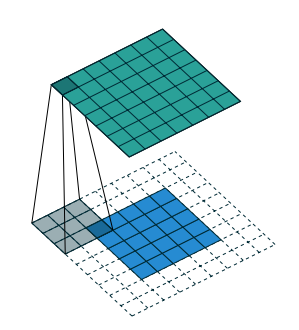
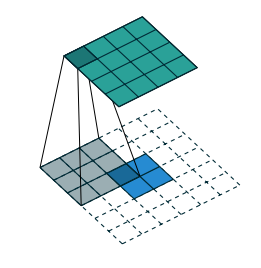
</div>

In [30]:
import numpy as np
from scipy.signal import convolve2d

# Example input and kernel
input_matrix = np.array([[1, 2], [3, 4]])
kernel = np.array([[0, 1], [2, 3]])

# Transposed convolution parameters
stride = 2
output_size = (input_matrix.shape[0] * stride, input_matrix.shape[1] * stride)

# Emulate transposed convolution with direct convolution and zero-padding
padded_input = np.zeros((input_matrix.shape[0] + (output_size[0] - 1), input_matrix.shape[1] + (output_size[1] - 1)))
padded_input[:input_matrix.shape[0], :input_matrix.shape[1]] = input_matrix

output_matrix_emulated = convolve2d(padded_input, np.rot90(kernel, 2), mode='valid')

print("Original Input Matrix:")
print(input_matrix)
print("\nKernel:")
print(kernel)
print("\nEmulated Transposed Convolution Output:")
print(output_matrix_emulated)


Original Input Matrix:
[[1 2]
 [3 4]]

Kernel:
[[0 1]
 [2 3]]

Emulated Transposed Convolution Output:
[[20.  8.  0.  0.]
 [ 4.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


The convolution of a 3×3 kernel on a 4×4 input with unitary stride and no padding produces a 2 × 2 output. The transpose of this convolution will
then have an output of shape 4 × 4 when applied on a 2 × 2 input.

<div style="display: flex; justify-content: space-between;">
    <div>
        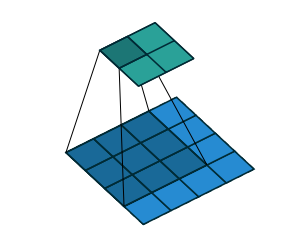
        <p style="text-align: center;">Convolution</p>
    </div>
    <div>
        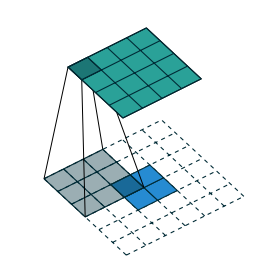
        <p style="text-align: center;">Deconvolution</p>
    </div>
</div>


![Evolution GIF](https://maucher.home.hdm-stuttgart.de/Pics/gif/no_padding_no_strides_transposed.gif)


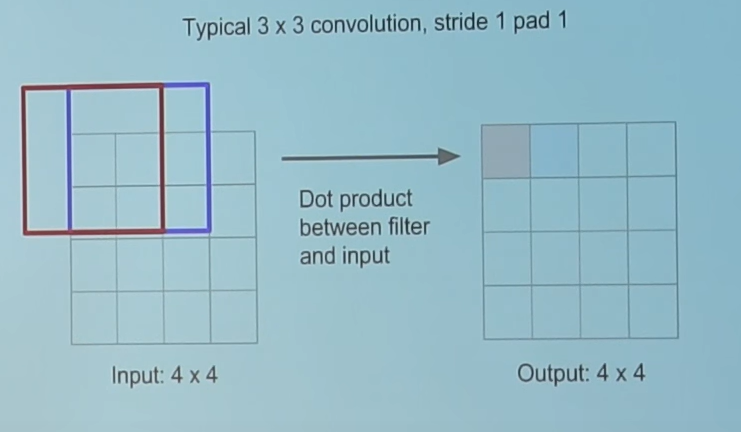

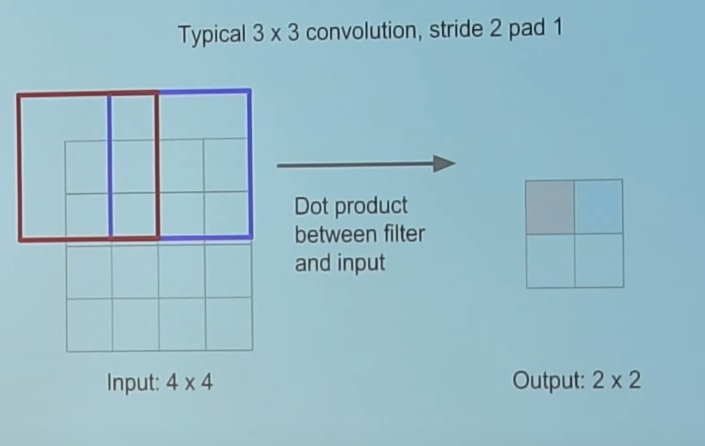

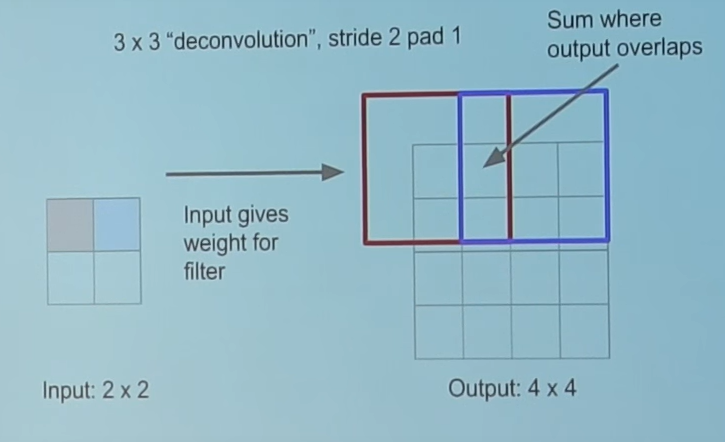

#### Conv2DTranspose in Keras

Parameters:

* filters: Number of filters/kernels.
* kernel_size: Size of the filters.
* strides: Step size for filter application.
* activation: the activation function to apply to the output.
* output_padding: Used to adjust output shape.

`output_padding` and `data_format`.

- **output_padding**: This argument specifies how much padding to add to the output tensor along the height and width dimensions. Padding is the process of adding extra zeros to the edges of the tensor to change its size or shape. Output padding can be used to control the output size of the transposed convolution, especially when the stride is larger than one. The output size of a transposed convolution depends on the input size, the kernel size, the stride, and the padding. The formula for calculating the output size is:

### $$
\begin{aligned}
h_{out} &= (h_{in} - 1) \times s_h - 2p_h + k_h + o_h \\
w_{out} &= (w_{in} - 1) \times s_w - 2p_w + k_w + o_w
\end{aligned}
$$

where $h_{in}$ and $w_{in}$ are the height and width of the input, $h_{out}$ and $w_{out}$ are the height and width of the output, $k_h$ and $k_w$ are the height and width of the kernel, $s_h$ and $s_w$ are the stride along the height and width dimensions, $p_h$ and $p_w$ are the padding along the height and width dimensions, and $o_h$ and $o_w$ are the output padding along the height and width dimensions.

Output padding can be an integer or a tuple/list of two integers, indicating the amount of padding to add to the bottom/right or top/left of the output tensor. If it is a single integer, the same value is applied to both dimensions. The output padding must be lower than the stride, otherwise the output size will be ambiguous. If output padding is set to None (default), the output size is inferred from the other arguments.

For example, suppose we have an input tensor of shape (1, 2, 2, 1), and we want to apply a transposed convolution with a kernel size of (2, 2), a stride of (2, 2), and a padding of "same". The output size without output padding would be:

### $$
\begin{aligned}
h_{out} &= (2 - 1) \times 2 - 2 \times 0 + 2 + 0 = 4 \\
w_{out} &= (2 - 1) \times 2 - 2 \times 0 + 2 + 0 = 4
\end{aligned}
$$

The output tensor would have a shape of (1, 4, 4, 1). If we want to reduce the output size by one along each dimension, we can use an output padding of (1, 1). The output size with output padding would be:

### $$
\begin{aligned}
h_{out} &= (2 - 1) \times 2 - 2 \times 0 + 2 + 1 = 5 \\
w_{out} &= (2 - 1) \times 2 - 2 \times 0 + 2 + 1 = 5
\end{aligned}
$$

The output tensor would have a shape of (1, 5, 5, 1).

- **data_format**: This argument specifies the order of the dimensions in the input and output tensors. There are two possible values: "channels_last" or "channels_first". The channel dimension is the one that indicates the number of filters or feature maps in the tensor. "channels_last" means that the channel dimension is the last one, while "channels_first" means that the channel dimension is the first one. The data format affects how the transposed convolution is performed and how the output size is calculated.

For example, suppose we have an input tensor of shape (1, 2, 2, 1), and we want to apply a transposed convolution with a kernel size of (2, 2), a stride of (2, 2), and a padding of "same". If the data format is "channels_last", the input tensor has a shape of (batch_size, height, width, channels), and the output tensor has a shape of (batch_size, height, width, filters). If the data format is "channels_first", the input tensor has a shape of (batch_size, channels, height, width), and the output tensor has a shape of (batch_size, filters, height, width).

The data format can be specified explicitly as an argument to the Conv2DTranspose layer, or it can be inferred from the image_data_format value found in the Keras config file at ~/.keras/keras.json. If the config file does not exist or the value is not specified, the default data format is "channels_last".


In [40]:
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.models import Sequential

# Assume we have an input tensor with shape (batch_size, height, width, channels)
input_shape = (1, 4, 4, 1)

# Create a simple model
model = Sequential()

# Add a Conv2DTranspose layer
model.add(Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding='valid', input_shape=input_shape[1:]))

# Generate a random input tensor
import numpy as np
input_data = np.random.rand(*input_shape)

# Get the output
output_data = model.predict(input_data)

# Visualize shapes
print("Input Shape:", input_data.shape)
print("Output Shape:", output_data.shape)

1/1 [==============================] - 0s 58ms/step
Input Shape: (1, 4, 4, 1)
Output Shape: (1, 9, 9, 1)


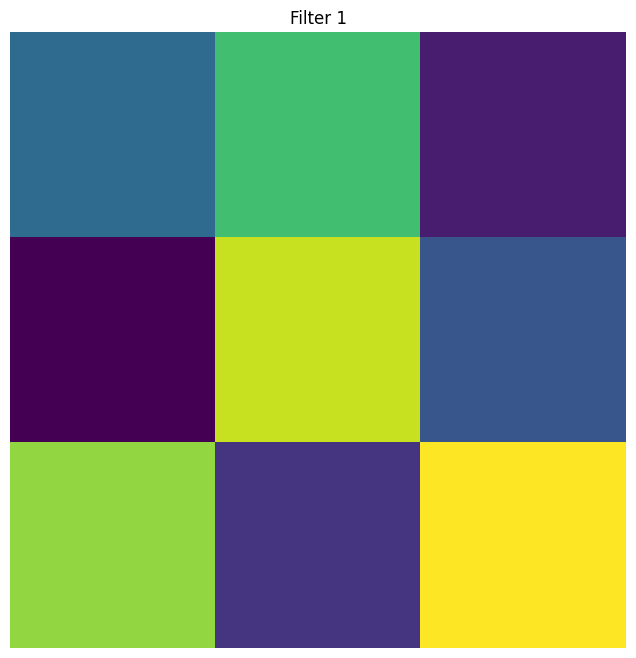

In [38]:
import matplotlib.pyplot as plt
# Get the filter weights
filters = model.get_weights()[0]

# Visualize the filters
plt.figure(figsize=(8, 8))
for i in range(filters.shape[-1]):
    plt.subplot(1, filters.shape[-1], i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='viridis')
    plt.title(f'Filter {i + 1}')
    plt.axis('off')
plt.show()

An alternative to using Conv2DTranspose layers is to instead use an UpSampling2D layer followed by a normal Conv2D layer with stride 1.

UpSampling2D repeats existing pixel values, while Conv2DTranspose introduces learnable parameters for upsampling.

In [56]:
from tensorflow.keras import layers, Sequential

# Assume we have an input tensor with shape (batch_size, height, width, channels)
input_shape = (1, 4, 4, 1)

# Generate a random input tensor
import numpy as np
input_data = np.random.rand(*input_shape)

# Create a simple model
model_upsampling_conv2d = Sequential()

# Add UpSampling2D layer
model_upsampling_conv2d.add(layers.UpSampling2D(size=2, input_shape=input_shape[1:]))

# Add Conv2D layer
model_upsampling_conv2d.add(layers.Conv2D(1, kernel_size=4, strides=1, padding="same"))

# Get the output
output_data_upsampling_conv2d = model_upsampling_conv2d.predict(input_data)

# Visualize shapes
print("Input Shape:", input_data.shape)
print("Output Shape (UpSampling2D + Conv2D):", output_data_upsampling_conv2d.shape)

1/1 [==============================] - 0s 54ms/step
Input Shape: (1, 4, 4, 1)
Output Shape (UpSampling2D + Conv2D): (1, 8, 8, 1)


#### Applications

Architectures, which shall provide a visualisation of the learned features, such as in the  [Visualizing and Understanding Convolutional Networks](https://arxiv.org/pdf/1311.2901.pdf).

CNNs for increasing image resolution, e.g. Accelerating the Super-Resolution CNN,

generative networks, e.g. Generative Adversarial Networks (GANs) 

CNNs for semantic segmentation 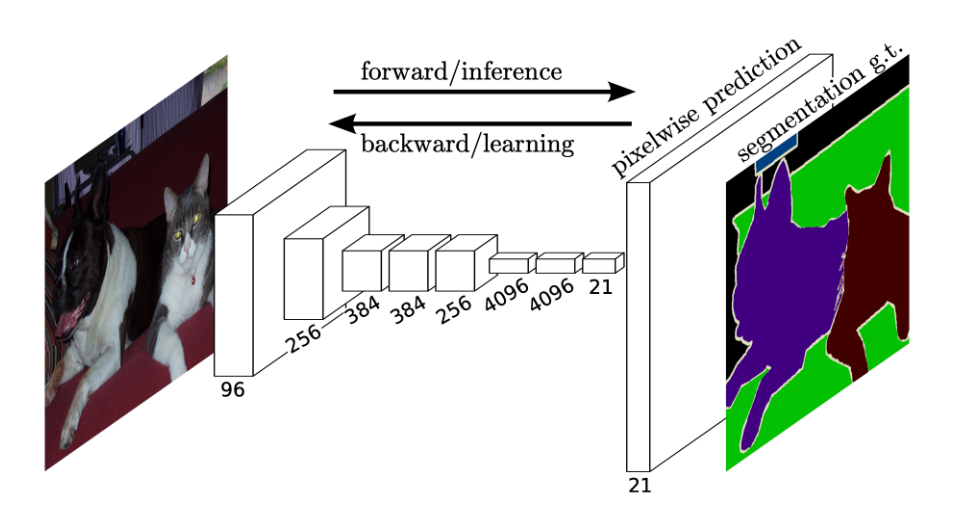

REF : 

[Convolution arithmetic](https://arxiv.org/pdf/1603.07285v1.pdf)

[Learnable Upsampling : Fractionally strided convolutions](https://youtu.be/ByjaPdWXKJ4)

[Deconvolution](https://hannibunny.github.io/mlbook/neuralnetworks/03ConvolutionNeuralNetworks.html#deconvolution)